In [1]:
%pip install sklearn-som

In [2]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn_som.som import SOM
from sklearn.metrics.cluster import silhouette_score

In [3]:
dataset_iris = load_iris()
x = dataset_iris.data
y = dataset_iris.target

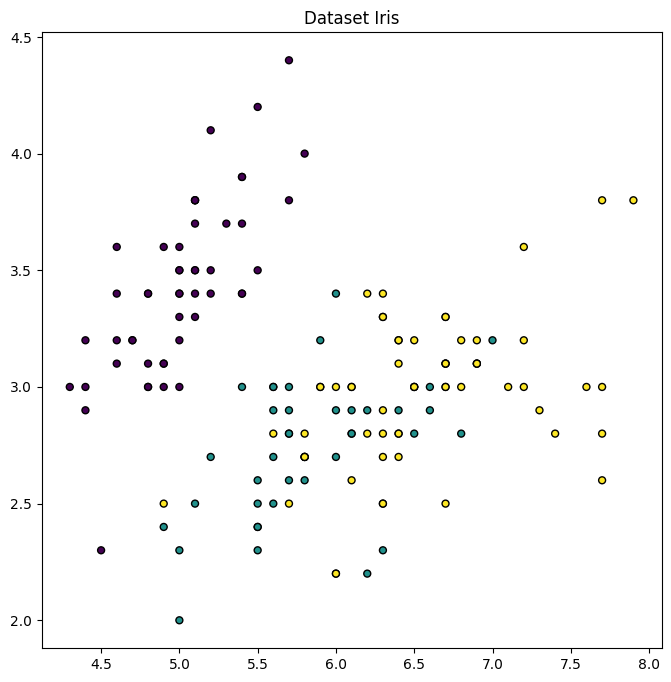

In [4]:
plt.figure(figsize=(8, 8))
plt.title("Dataset Iris")
plt.scatter(x[:, 0], x[:, 1], c = y, marker="o", s=25, edgecolor="k")
plt.show()

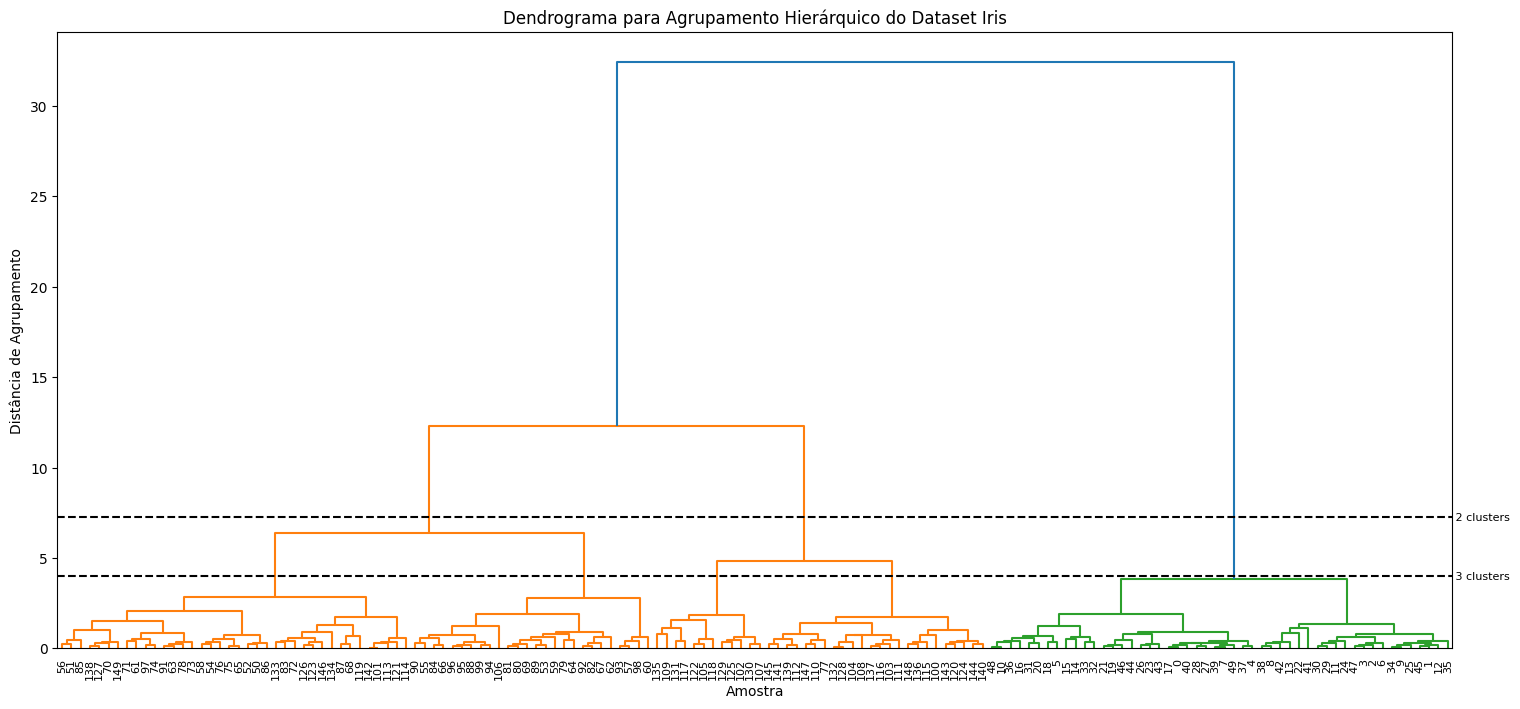

In [5]:
# Hierárquico

linkage_array = ward(x)

plt.figure(figsize=(18, 8))
plt.title("Dendrograma para Agrupamento Hierárquico do Dataset Iris")
dendrogram(linkage_array, orientation='top', distance_sort='descending', leaf_font_size=8)
plt.xlabel("Amostra")
plt.ylabel("Distância de Agrupamento")

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' 2 clusters', va='center', fontdict={'size': 8})
ax.text(bounds[1], 4, ' 3 clusters', va='center', fontdict={'size': 8})

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


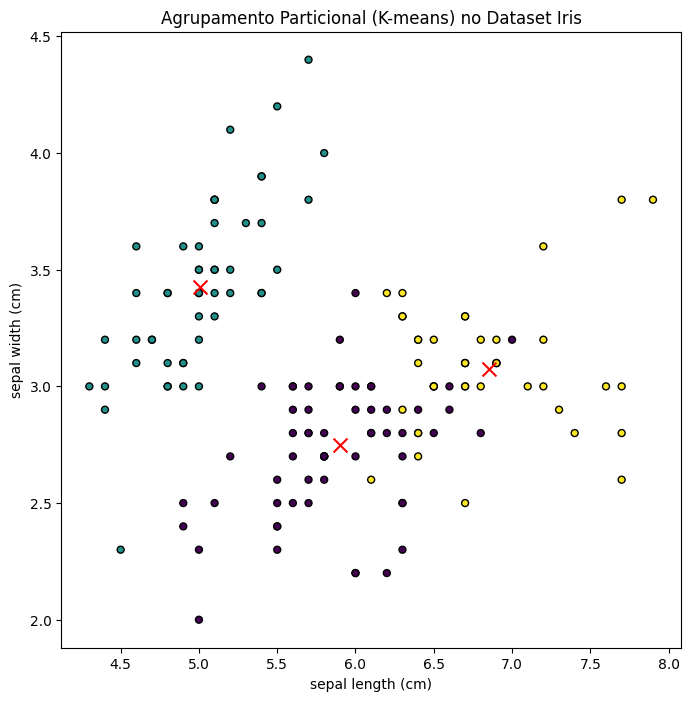

In [6]:
# Particionais baseados em erro médio quadrático (K-means)

kmeans = KMeans(n_clusters=3)
kmeans.fit(x)


plt.figure(figsize=(8, 8))
plt.title("Agrupamento Particional (K-means) no Dataset Iris")
plt.scatter(x[:, 0], x[:, 1],  marker="o", c=kmeans.labels_, cmap='viridis', s=25, edgecolor="k")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", c='red', s=100)
plt.xlabel(dataset_iris.feature_names[0])
plt.ylabel(dataset_iris.feature_names[1])
plt.show()

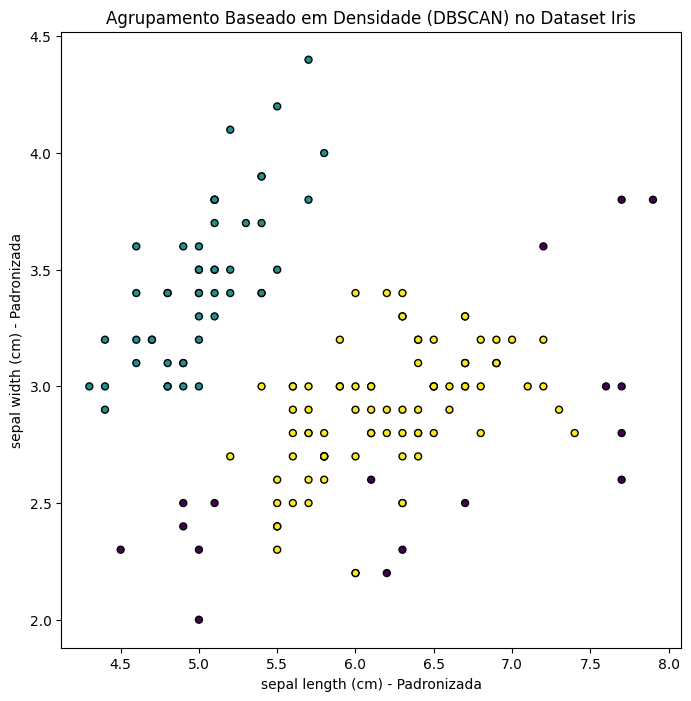

Número estimado de clusters: 2
Número estimado de pontos de ruído: 17


In [7]:
# Baseados em Densidade (DBSCAN)

epsilon = 0.5
min_samples = 5

dbscan = DBSCAN(eps=epsilon, min_samples=min_samples).fit(x)

labels = dbscan.labels_

caracteristica = [f"{caracteristica} - Padronizada" for caracteristica in dataset_iris.feature_names]

plt.figure(figsize=(8, 8))
plt.title("Agrupamento Baseado em Densidade (DBSCAN) no Dataset Iris")
plt.scatter(x[:, 0], x[:, 1], c = labels, cmap= 'viridis', marker="o", s=25, edgecolor="k")
plt.xlabel(caracteristica[0])
plt.ylabel(caracteristica[1])
plt.show()

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Número estimado de clusters: %d" % n_clusters_)
print("Número estimado de pontos de ruído: %d" % n_noise_)

<ipython-input-8-aaa40ded9338>:10: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x[:, 0], x[:, 1], marker = "x", c = labels, s = 25, edgecolor = "k")


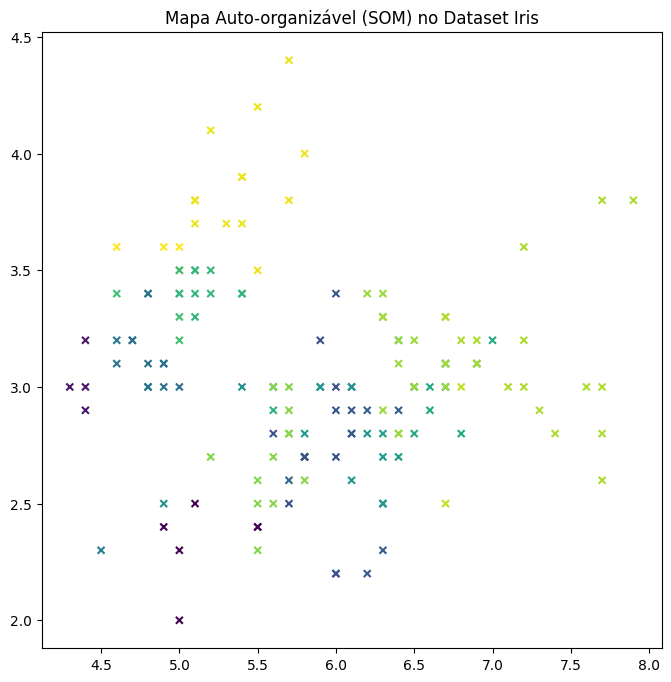

In [8]:
# Baseado em Redes Neurais (SOM)

som = SOM(m=10, n=10, dim=4)
som.fit(x)

labels = som.predict(x)

plt.figure(figsize=(8, 8))
plt.title("Mapa Auto-organizável (SOM) no Dataset Iris")
plt.scatter(x[:, 0], x[:, 1], marker = "x", c = labels, s = 25, edgecolor = "k")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


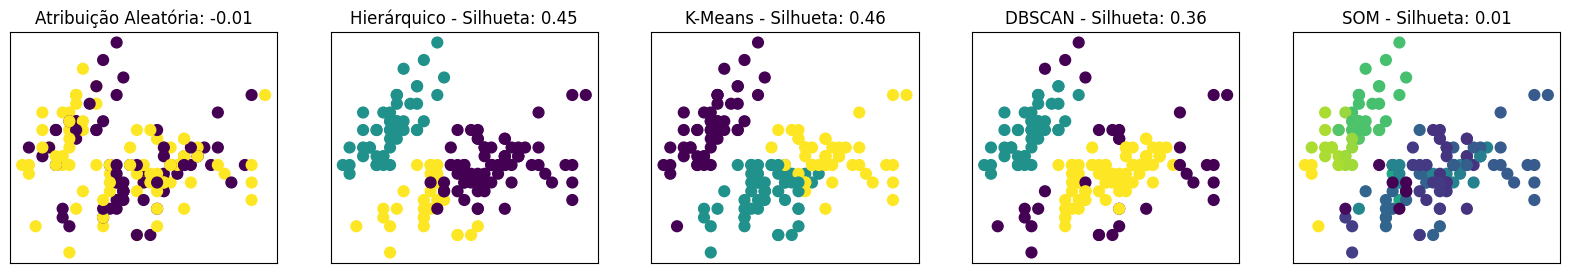

In [9]:
# Silhueta

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

fig, axes = plt.subplots(1, 5, figsize=(20, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(x))

axes[0].scatter(x_scaled[:, 0], x_scaled[:, 1], c=random_clusters, s=60)
axes[0].set_title("Atribuição Aleatória: {:.2f}".format(
    silhouette_score(x_scaled, random_clusters)))

algoritmos = [
    ("Hierárquico", AgglomerativeClustering(n_clusters=3)),
    ("K-Means", KMeans(n_clusters=3)),
    ("DBSCAN", DBSCAN()),
    ("SOM", SOM(m=10, n=10, dim=4))
]

for ax, (nome, algoritmo) in zip(axes[1:], algoritmos):
    if nome == "SOM":
        algoritmo.fit(x)
        clusters = algoritmo.predict(x)
    else:
        clusters = algoritmo.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, clusters)

    # Plotar a atribuição de cluster
    ax.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, s=60)
    ax.set_title("{} - Silhueta: {:.2f}".format(nome, silhouette_avg))

plt.show()

<ipython-input-12-2d9fa40c243c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_index=True)
<ipython-input-12-2d9fa40c243c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_index=True)
<ipython-input-12-2d9fa40c243c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_index=True)
<ipython-input-12-2d9fa40c243c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_inde

Optimal k for Hierárquico is: 1


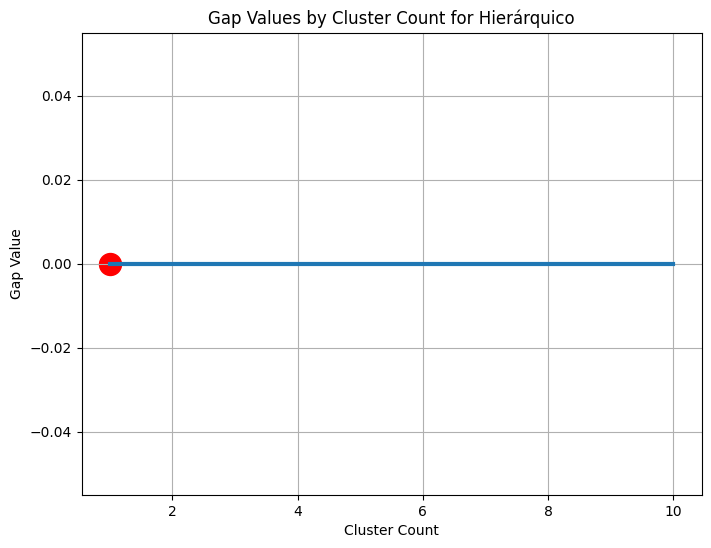

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-2d9fa40c243c>:33: FutureWarning: The frame.append 

Optimal k for K-Means is: 2


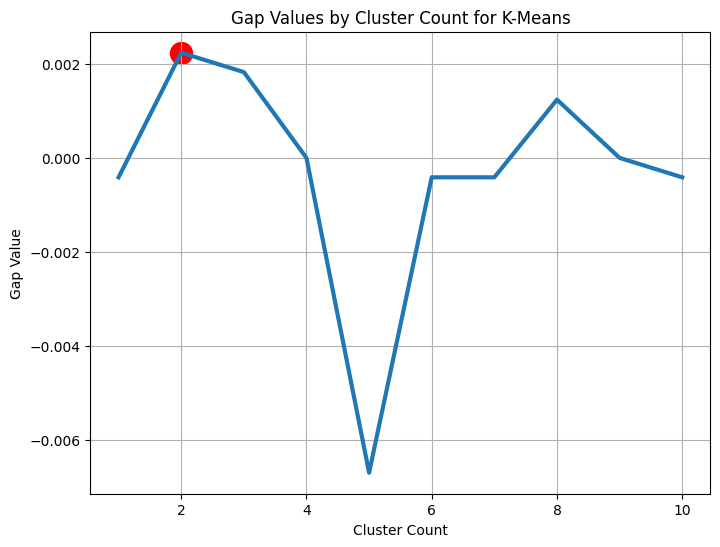

<ipython-input-12-2d9fa40c243c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_index=True)
<ipython-input-12-2d9fa40c243c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_index=True)
<ipython-input-12-2d9fa40c243c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_index=True)
<ipython-input-12-2d9fa40c243c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_inde

Optimal k for DBSCAN is: 1


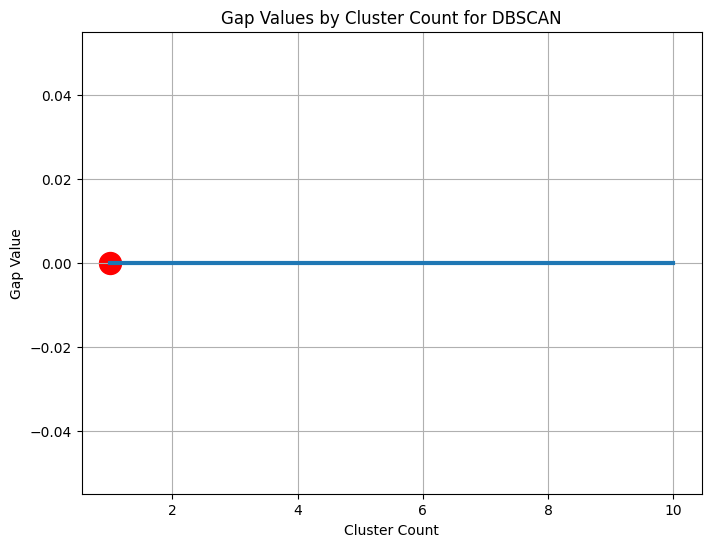

<ipython-input-12-2d9fa40c243c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_index=True)
<ipython-input-12-2d9fa40c243c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_index=True)
<ipython-input-12-2d9fa40c243c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_index=True)
<ipython-input-12-2d9fa40c243c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_inde

Optimal k for SOM is: 7


<ipython-input-12-2d9fa40c243c>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_index=True)


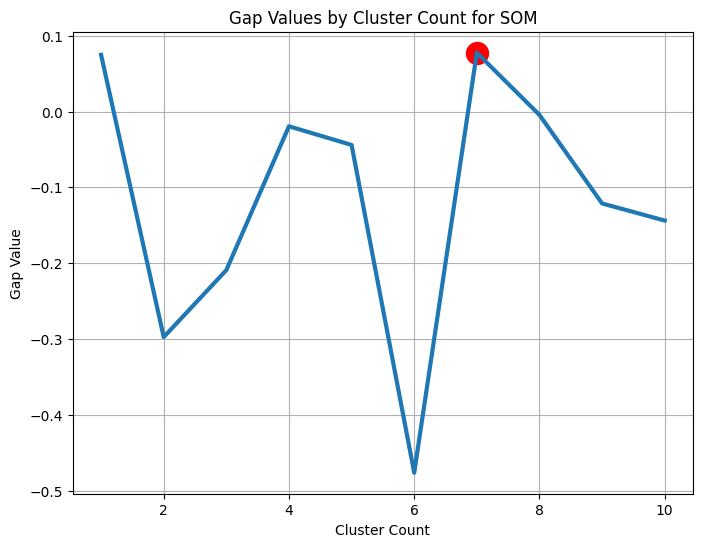

In [12]:
# Estatística GAP

def optimalK(data, nrefs=3, maxClusters=15):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})

    for gap_index, k in enumerate(range(1, maxClusters)):
        refDisps = np.zeros(nrefs)

        for i in range(nrefs):
            randomReference = np.random.random_sample(size=data.shape)

            if isinstance(algoritmo, SOM):
                algoritmo.fit(data)
                clusters = algoritmo.predict(data)
            else:
                clusters = algoritmo.fit_predict(data_scaled)

            refDisp = silhouette_score(data_scaled, clusters)
            refDisps[i] = refDisp

        if isinstance(algoritmo, SOM):
            algoritmo.fit(data)
            clusters = algoritmo.predict(data)
        else:
            clusters = algoritmo.fit_predict(data_scaled)

        origDisp = silhouette_score(data_scaled, clusters)

        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps[gap_index] = gap

        resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

algoritmos = [
    ("Hierárquico", AgglomerativeClustering(n_clusters=3)),
    ("K-Means", KMeans(n_clusters=3)),
    ("DBSCAN", DBSCAN(eps=0.5, min_samples=5)),
    ("SOM", SOM(m=10, n=10, dim=4)),
]

for nome, algoritmo in algoritmos:
    k, gapdf = optimalK(data_scaled, nrefs=3, maxClusters=11)
    print('Optimal k for {} is: {}'.format(nome, k))

    plt.figure(figsize=(8, 6))
    plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
    plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
    plt.grid(True)
    plt.xlabel('Cluster Count')
    plt.ylabel('Gap Value')
    plt.title('Gap Values by Cluster Count for {}'.format(nome))
    plt.show()
